In [1]:
%pip install -qU pip
%pip install -q opencv-python numpy matplotlib
%pip list | awk '/opencv-python|numpy|matplotlib/ {print $1}'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
matplotlib
matplotlib-inline
numpy
opencv-python
Note: you may need to restart the kernel to use updated packages.


In [2]:
try:
    import numpy as np
    from opencv_imageio import *
    import matplotlib.pyplot as plt
except Exception as e:
    print(f"Caught exception: {e}")

In [3]:
# load an image from disk using opencv
IMG_FILE: str = "tux.jpg"
img_bgr: np.ndarray = cv.imread(IMG_FILE)
print(f"Image {IMG_FILE} loaded as {type(img_bgr)}: Image shape: {img_bgr.shape} dtype {img_bgr.dtype}")

Image tux.jpg loaded as <class 'numpy.ndarray'>: Image shape: (244, 206, 3) dtype uint8


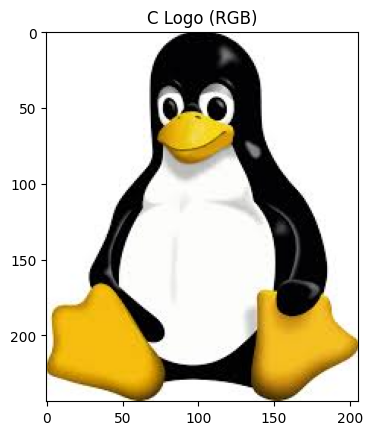

In [4]:
# convert to RGB using numpy
img_rgb = img_bgr[..., [2,1,0]]
plot(img_rgb, "C Logo (RGB)")

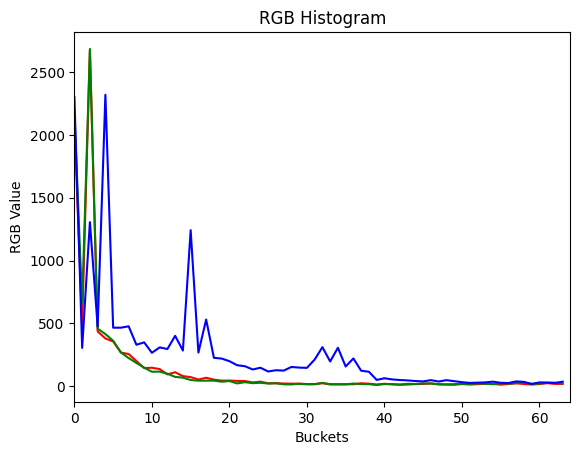

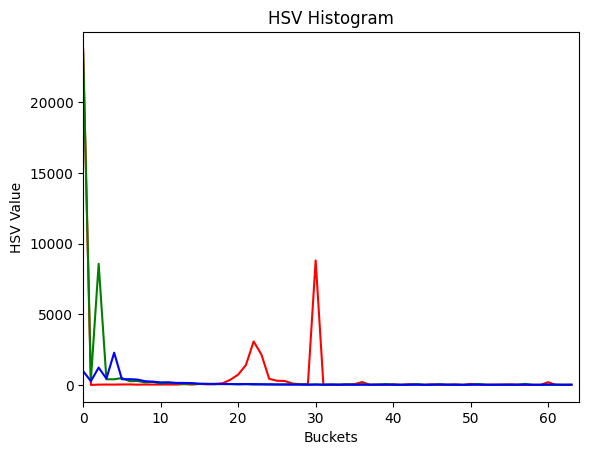

In [5]:
# calculate and plot histograms
# histogram value bins (quantization)
hist_bins: int = 64

# calculate RGB and HSV histograms
hist_rgb = calcRGBHistogram(img_rgb, hist_bins)
hist_hsv = calcHSVHistogram(img_rgb, hist_bins)

# plot histograms
plotRGBHistogram(hist_rgb, limits=[0,hist_bins], title="RGB Histogram")
plotHSVHistogram(hist_hsv, limits=[0,hist_bins], title="HSV Histogram")

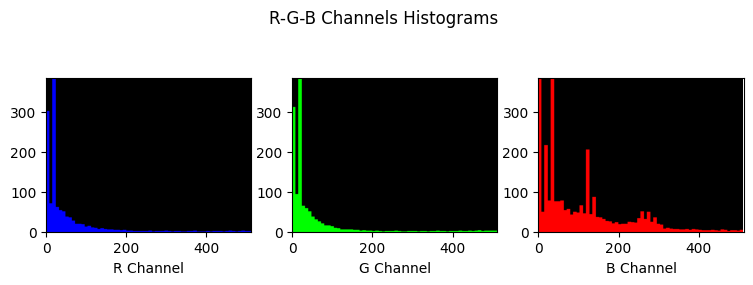

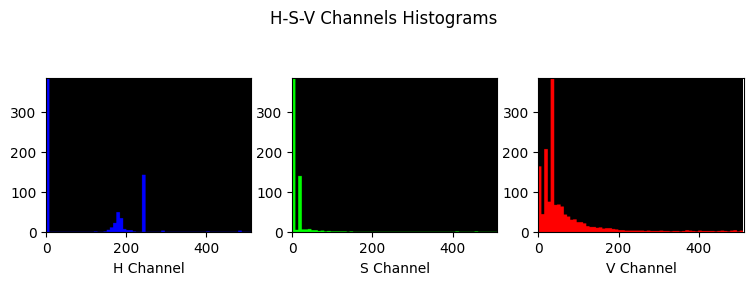

In [6]:
# prepare histogram diagram for overlay
r_hist, g_hist, b_hist = hist_rgb
h_hist, s_hist, v_hist = hist_hsv

# graph dimensions
h: int = 384
w: int = 512

# plot RGB histograms
rh: np.ndarray = barHistogram(r_hist, hist_bins, histogram_dimensions=(w,h), color=(0,0,255), thickness=-1)
gh: np.ndarray = barHistogram(g_hist, hist_bins, histogram_dimensions=(w,h), color=(0,255,0), thickness=-1)
bh: np.ndarray = barHistogram(b_hist, hist_bins, histogram_dimensions=(w,h), color=(255,0,0), thickness=-1)

# plot HSV histograms
hh: np.ndarray = barHistogram(h_hist, hist_bins, histogram_dimensions=(w,h), color=(0,0,255), thickness=-1)
sh: np.ndarray = barHistogram(s_hist, hist_bins, histogram_dimensions=(w,h), color=(0,255,0), thickness=-1)
vh: np.ndarray = barHistogram(v_hist, hist_bins, histogram_dimensions=(w,h), color=(255,0,0), thickness=-1)

# draw RGB histograms
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(rh)
plt.xlim([0,w])
plt.ylim([0,h])
plt.xlabel("R Channel")
plt.subplot(132)
plt.imshow(gh)
plt.xlim([0,w])
plt.ylim([0,h])
plt.xlabel("G Channel")
plt.subplot(133)
plt.imshow(bh)
plt.xlim([0,w])
plt.ylim([0,h])
plt.xlabel("B Channel")
plt.suptitle("R-G-B Channels Histograms")
plt.show()

# draw HSV histograms
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(hh)
plt.xlim([0,w])
plt.ylim([0,h])
plt.xlabel("H Channel")
plt.subplot(132)
plt.imshow(sh)
plt.xlim([0,w])
plt.ylim([0,h])
plt.xlabel("S Channel")
plt.subplot(133)
plt.imshow(vh)
plt.xlim([0,w])
plt.ylim([0,h])
plt.xlabel("V Channel")
plt.suptitle("H-S-V Channels Histograms")
plt.show()

Histogram H: 384 W: 512 Chan: 3
Image H: 244 W: 206 Chan: 3
Resized Histogram H: 64 W: 85 Chan: 3


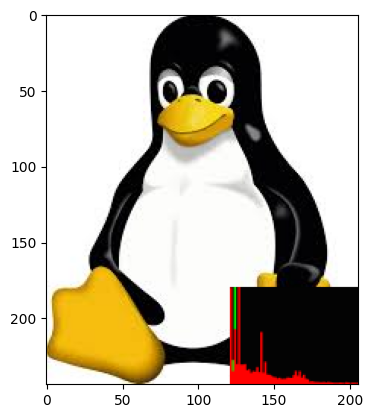

In [7]:
# combine histograms
combined_histogram: np.ndarray = combineHistograms([rh, gh, bh], 100)

# get shapes
hist_rows, hist_cols, hist_chans = combined_histogram.shape
print(f"Histogram H: {hist_rows} W: {hist_cols} Chan: {hist_chans}")
img_rows, img_cols, img_chans = img_rgb.shape
print(f"Image H: {img_rows} W: {img_cols} Chan: {img_chans}")

# resize histogram
resized_hist = scaleArray(combined_histogram, img_rgb, 1/6, 1/6)
hist_rows, hist_cols, hist_chans = resized_hist.shape

# display
target_frame: np.ndarray = overlayHistogram(resized_hist, img_rgb, (1/6,1/6))
plt.imshow(target_frame)